The goal here is to try the algorithm is given data and asked to extract knowledge based on any patterns it is able to find

- Image Clustering

- Topic Identification (when analysing emails, documents articles)

- Dimensionality Reduction


#### HAC: Hierarchical Agglomerative Clustering

how the algorithm thinks of the ‘distance’ between two existing clusters is variable. Scikit-learn provides three such ‘linkage criteria’ as part of its HAC package:


###### HAC starts off by viewing each individual point as its own cluster of one.
It then merges the two existing clusters that are ‘closest’ to each other (note; the definition of ‘distance’ in this context is changeable — we’ll explore this later on). The HAC algorithm will iteratively merge ‘close’ clusters, until it reaches its natural conclusion where all data points belong to one single cluster.

- ward (default): picks the two clusters to merge in a way that the variance within all clusters increases the least.Generally, this leads to clusters that are fairly equally sized.
- average: merges the two clusters that have the smallest average distance between all the points.
- complete (or maximum linkage): merges the two clusters that have the smallest maximum distance between their points.



In [9]:
#import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [2]:
#import dataset created in other jupyter notebook
data = pd.read_csv('my_data.csv')

data.head()

,id,title,main_artist,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Like
0,0TLAptKgYxe7F0KewWH6X6,I Need A Forest Fire,Bon Iver,0.293,0.290,2.0,-11.596,1.0,0.696,0.875000,0.1000,0.0373,128.276,257220.0,4.0,1
1,2y0rHDTckWQ7of6tI1yc82,Naked Life,Oko Ebombo,0.624,0.321,0.0,-9.776,1.0,0.463,0.056000,0.1030,0.3040,73.996,255030.0,4.0,1
2,5nVE45ithgyVocZp5XLAk6,The Bug Collector,Haley Heynderickx,0.538,0.419,10.0,-9.705,1.0,0.777,0.329000,0.0967,0.5290,99.622,228460.0,4.0,1
3,66VuLX5s1nrZzzQqJqPbri,Simply Are,Arto Lindsay,0.682,0.694,7.0,-11.393,0.0,0.289,0.714000,0.0961,0.9540,173.851,224107.0,4.0,1
4,0X61Ud5Uzv44RvY3s1SsuO,Imogen,Nick Mulvey,0.493,0.584,5.0,-6.894,1.0,0.850,0.000353,0.1140,0.2340,86.909,255533.0,4.0,1


In [3]:
data =  data.dropna()

### Exploratory Analysis

In [4]:
data.dtypes

id                   object
title                object
main_artist          object
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
time_signature      float64
Like                  int64
dtype: object

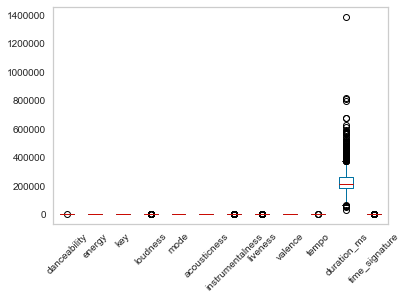

In [5]:
features = ['danceability', 'energy', 'key','loudness', 'mode', 'acousticness', 'instrumentalness', 'liveness','valence', 'tempo', 'duration_ms', 'time_signature']


data.boxplot(features, grid=False, rot=45, fontsize=10)


In [6]:
corr = data.corr()
corr

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Like
danceability,1.000000,0.050896,0.016974,0.275182,-0.122660,-0.065995,-0.139722,-0.086533,0.525450,-0.077248,-0.398621,0.161054,-0.175324
energy,0.050896,1.000000,0.007981,0.735612,-0.050227,-0.730083,-0.186473,0.178053,0.381213,0.198043,0.034489,0.168993,-0.583497
key,0.016974,0.007981,1.000000,-0.025853,-0.136561,-0.005742,0.013650,-0.012726,0.007216,-0.011825,-0.034347,-0.011749,0.000675
loudness,0.275182,0.735612,-0.025853,1.000000,-0.078966,-0.537215,-0.382664,0.084118,0.386490,0.132514,-0.096936,0.159958,-0.560181
mode,-0.122660,-0.050227,-0.136561,-0.078966,1.000000,0.058960,-0.010970,0.003304,-0.045908,0.005956,0.014923,-0.053153,0.047468
acousticness,-0.065995,-0.730083,-0.005742,-0.537215,0.058960,1.000000,0.160766,-0.104851,-0.246819,-0.171704,-0.093578,-0.130510,0.510912
instrumentalness,-0.139722,-0.186473,0.013650,-0.382664,-0.010970,0.160766,1.000000,-0.055934,-0.153845,-0.031559,0.035185,-0.047716,0.336465
liveness,-0.086533,0.178053,-0.012726,0.084118,0.003304,-0.104851,-0.055934,1.000000,0.039465,0.039973,0.005220,-0.032590,-0.075086
valence,0.525450,0.381213,0.007216,0.386490,-0.045908,-0.246819,-0.153845,0.039465,1.000000,0.113932,-0.299163,0.130497,-0.256429
tempo,-0.077248,0.198043,-0.011825,0.132514,0.005956,-0.171704,-0.031559,0.039973,0.113932,1.000000,0.034355,0.035387,-0.149638


### Data Preprocessing: FEATURE ENGINEERING

Given that HAC deals with ‘distances’ — abstract or otherwise — we need to standard-scale our data before feeding it into the clustering algorithm. 
- This ensures that our final results are not skewed by feature units. 
- For example, tempo typically ranges between 70 and 180 beats per minute, whereas most other measures fall somewhere between 0 and 1. Without scaling, two songs with very different tempos would always be very ‘far apart’, even if they were identical on the other metrics.

In [7]:
from sklearn.preprocessing import StandardScaler

data_scale = StandardScaler().fit_transform(data[features])


## Data Clustering with K-Means

In [10]:
kmeans = KMeans(n_clusters=3)
model = kmeans.fit(data_scale)
data['labels'] = model.labels_

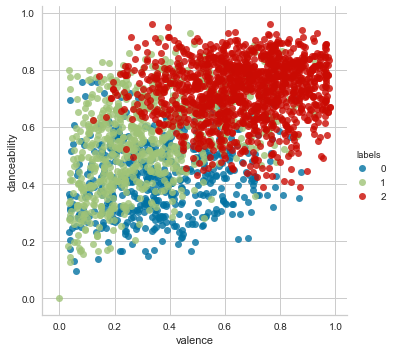

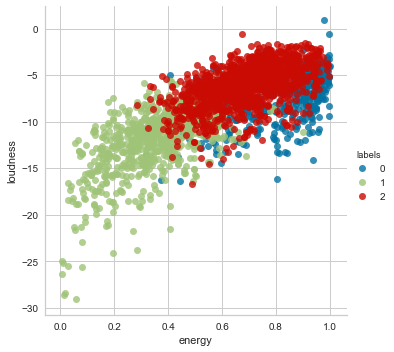

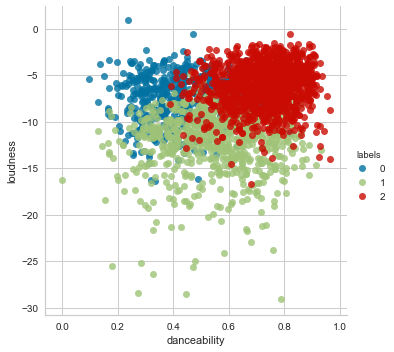

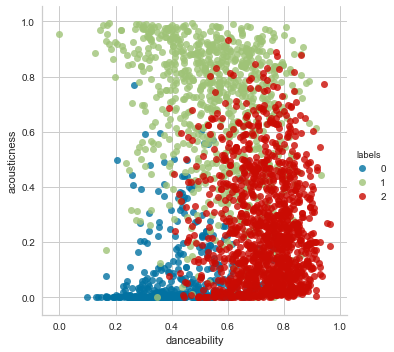

In [11]:
sns.lmplot(data=data, x='valence', y='danceability', hue='labels',  fit_reg=False, legend=True, legend_out=True)

sns.lmplot(data=data, x='energy', y='loudness', hue='labels',  fit_reg=False, legend=True, legend_out=True)

sns.lmplot(data=data, x='danceability', y='loudness', hue='labels',  fit_reg=False, legend=True, legend_out=True)

sns.lmplot(data=data, x='danceability', y='acousticness', hue='labels',  fit_reg=False, legend=True, legend_out=True)